In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from qiskit_experiments.framework import (
    ExperimentData,
    ExperimentDecoder,
    ExperimentEncoder,
)
from qiskit_research.mzm_generation import KitaevHamiltonianAnalysis

In [2]:
# load data from local disk

filenames = [
    "2022-06-07T14:21:40.824201_ibm_washington_n6",
    "2022-06-07T18:08:27.973157_ibm_washington_n8",
    "2022-06-07T21:15:33.395150_ibm_washington_n10",
    "2022-06-08T18:04:56.647624_ibm_washington_n12",
]

# directory with test data, edit this as appropriate
basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"
# basedir = ""

data_raw = []
for file in filenames:
    with open(os.path.join(basedir, "data/ibm_washington", f"{file}.json")) as f:
        # this may raise an error from Qiskit Experiments but it should be safe to ignore
        data_raw.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [98]:
filename = "2022-07-07T11:04:16.555343_ibm_washington_n6"

basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"

with open(os.path.join(basedir, "data/ibm_washington", f"{filename}.json")) as f:
    # this may raise an error from Qiskit Experiments but it should be safe to ignore
    data_raw.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [81]:
data_raw_staggered = []

In [82]:
filename = "2022-06-29T13:04:41.932001_ibm_washington_n10"

basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"

with open(os.path.join(basedir, "data/ibm_washington", f"{filename}.json")) as f:
    # this may raise an error from Qiskit Experiments but it should be safe to ignore
    data_raw_staggered.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [97]:
data_raw_staggered

[<ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: 8c1e4e3c-8a69-466d-b6f9-c37196455cfd>]

In [79]:
staggered_data = [data_list.pop()]

In [3]:
%%time
# run analysis
analysis = KitaevHamiltonianAnalysis()
data_list = []
i=0
for experiment_data in data_raw:
    data = analysis.run(experiment_data, replace_results=True)
    data.block_for_results()
    data_list.append(data)
    print(i)

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


0
0
0
0
CPU times: user 7h 28min 51s, sys: 4min 14s, total: 7h 33min 6s
Wall time: 3h 37min 32s


In [99]:
data = analysis.run(data_raw[-1], replace_results=True)
data.block_for_results()
data_list.append(data)

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [83]:
analysis = KitaevHamiltonianAnalysis()
data = analysis.run(data_raw_staggered[-1], replace_results=True)
data.block_for_results()
staggered_data.append(data)

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [84]:
len(staggered_data)

2

In [100]:
params = []
fidelity_witness_avg = []
energy_exact = []
energy = []
energy_error = []
bdg_energy_exact = []
bdg_energy = []
edge_correlation_exact = []
edge_correlation = []
number_exact = []
number = []
parity_exact = []
parity = []
site_correlation_exact = []
site_correlation = []
for data in data_list:
    params.append(data.metadata["params"])

# load results
    fidelity_witness_avg.append(data.analysis_results("fidelity_witness_avg").value)
    energy_exact.append(data.analysis_results("energy_exact").value)
    energy.append(data.analysis_results("energy").value)
    energy_error.append(data.analysis_results("energy_error").value)
    bdg_energy_exact.append(data.analysis_results("bdg_energy_exact").value)
    bdg_energy.append(data.analysis_results("bdg_energy").value)
    edge_correlation_exact.append(data.analysis_results("edge_correlation_exact").value)
    edge_correlation.append(data.analysis_results("edge_correlation").value)
    number_exact.append(data.analysis_results("number_exact").value)
    number.append(data.analysis_results("number").value)
    parity_exact.append(data.analysis_results("parity_exact").value)
    parity.append(data.analysis_results("parity").value)
    site_correlation_exact.append(data.analysis_results("site_correlation_exact").value)
    site_correlation.append(data.analysis_results("site_correlation").value)

# create plot directory
PLOT_DIR = f"plots/Washington_n_experiment"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

print(params)

[KitaevHamiltonianExperimentParameters(timestamp='2022-06-07T14:21:40.824201', backend_name='ibm_washington', qubits=[108, 107, 106, 93, 87, 88], n_modes=6, tunneling_values=[-1.0], superconducting_values=[1.0], chemical_potential_values=[0.0, 0.75, 1.5, 2.25, 3.0], occupied_orbitals_list=[(), (0, 1, 2, 3, 4, 5), (0,), (1, 2, 3, 4, 5), (1,), (0, 2, 3, 4, 5)], dynamical_decoupling_sequences=[None, 'X2pm', 'XY4pm', 'XY8pm'], num_dd_passes=1, uhrig_spacing=False, concat_layers=1, pulse_scaling=False, num_twirled_circuits=0, seed=11364, basedir=None), KitaevHamiltonianExperimentParameters(timestamp='2022-06-07T18:08:27.973157', backend_name='ibm_washington', qubits=[28, 29, 30, 31, 32, 36, 51, 50], n_modes=8, tunneling_values=[-1.0], superconducting_values=[1.0], chemical_potential_values=[0.0, 0.75, 1.5, 2.25, 3.0], occupied_orbitals_list=[(), (0, 1, 2, 3, 4, 5, 6, 7), (0,), (1, 2, 3, 4, 5, 6, 7), (1,), (0, 2, 3, 4, 5, 6, 7)], dynamical_decoupling_sequences=[None, 'X2pm', 'XY4pm', 'XY8pm'

In [101]:
energy_error[-1]

{None: {'raw': (array([1.38113333, 1.61471269, 1.69944305, 2.10760896, 2.49913188]),
   array([0.00798556, 0.00921754, 0.01117252, 0.01340244, 0.0154848 ]),
   array([0.46037778, 0.41845184, 0.33877523, 0.33323646, 0.32428464])),
  'mem': (array([1.23551523, 1.44772397, 1.49185172, 1.85761602, 2.19866985]),
   array([0.01158537, 0.0135038 , 0.0163848 , 0.01959934, 0.02249874]),
   array([0.41183841, 0.37517681, 0.29739297, 0.29370979, 0.28529701])),
  'ps': (array([1.24105172, 1.37716022, 1.3023919 , 1.54447859, 1.73313956]),
   array([0.01737404, 0.01914693, 0.02217592, 0.02550347, 0.02844815]),
   array([0.41368391, 0.35689026, 0.25962513, 0.24419928, 0.22489031])),
  'pur': (array([0.03956915, 0.05558434, 0.09628086, 0.14943157, 0.20112115]),
   array([0.01737404, 0.01914693, 0.02217592, 0.02550347, 0.02844815]),
   array([0.01318972, 0.01440465, 0.0191931 , 0.0236268 , 0.02609726]))},
 'X2pm': {'raw': (array([1.42985   , 1.61197936, 1.57796805, 1.82812979, 2.11163188]),
   array([0

In [90]:
params_staggered = []
fidelity_witness_avg_staggered = []
energy_exact_staggered = []
energy_staggered = []
energy_error_staggered = []
bdg_energy_exact_staggered = []
bdg_energy_staggered = []
edge_correlation_exact_staggered = []
edge_correlation_staggered = []
number_exact_staggered = []
number_staggered = []
parity_exact_staggered = []
parity_staggered = []
site_correlation_exact_staggered = []
site_correlation_staggered = []
for data in staggered_data:
    params_staggered.append(data.metadata["params"])

# load results
    fidelity_witness_avg_staggered.append(data.analysis_results("fidelity_witness_avg").value)
    energy_exact_staggered.append(data.analysis_results("energy_exact").value)
    energy_staggered.append(data.analysis_results("energy").value)
    energy_error_staggered.append(data.analysis_results("energy_error").value)
    bdg_energy_exact_staggered.append(data.analysis_results("bdg_energy_exact").value)
    bdg_energy_staggered.append(data.analysis_results("bdg_energy").value)
    edge_correlation_exact_staggered.append(data.analysis_results("edge_correlation_exact").value)
    edge_correlation_staggered.append(data.analysis_results("edge_correlation").value)
    number_exact_staggered.append(data.analysis_results("number_exact").value)
    number_staggered.append(data.analysis_results("number").value)
    parity_exact_staggered.append(data.analysis_results("parity_exact").value)
    parity_staggered.append(data.analysis_results("parity").value)
    site_correlation_exact_staggered.append(data.analysis_results("site_correlation_exact").value)
    site_correlation_staggered.append(data.analysis_results("site_correlation").value)

# create plot directory
PLOT_DIR = f"plots/Washington_n_experiment"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

print(params)

[KitaevHamiltonianExperimentParameters(timestamp='2022-06-07T14:21:40.824201', backend_name='ibm_washington', qubits=[108, 107, 106, 93, 87, 88], n_modes=6, tunneling_values=[-1.0], superconducting_values=[1.0], chemical_potential_values=[0.0, 0.75, 1.5, 2.25, 3.0], occupied_orbitals_list=[(), (0, 1, 2, 3, 4, 5), (0,), (1, 2, 3, 4, 5), (1,), (0, 2, 3, 4, 5)], dynamical_decoupling_sequences=[None, 'X2pm', 'XY4pm', 'XY8pm'], num_dd_passes=1, uhrig_spacing=False, concat_layers=1, pulse_scaling=False, num_twirled_circuits=0, seed=11364, basedir=None), KitaevHamiltonianExperimentParameters(timestamp='2022-06-07T18:08:27.973157', backend_name='ibm_washington', qubits=[28, 29, 30, 31, 32, 36, 51, 50], n_modes=8, tunneling_values=[-1.0], superconducting_values=[1.0], chemical_potential_values=[0.0, 0.75, 1.5, 2.25, 3.0], occupied_orbitals_list=[(), (0, 1, 2, 3, 4, 5, 6, 7), (0,), (1, 2, 3, 4, 5, 6, 7), (1,), (0, 2, 3, 4, 5, 6, 7)], dynamical_decoupling_sequences=[None, 'X2pm', 'XY4pm', 'XY8pm'

In [89]:
staggered_data[0]

<ExperimentData[KitaevHamiltonianExperiment], backend: None, status: ExperimentStatus.DONE, experiment_id: 76cf7977-27a9-4b60-9326-13413b68e7b5>

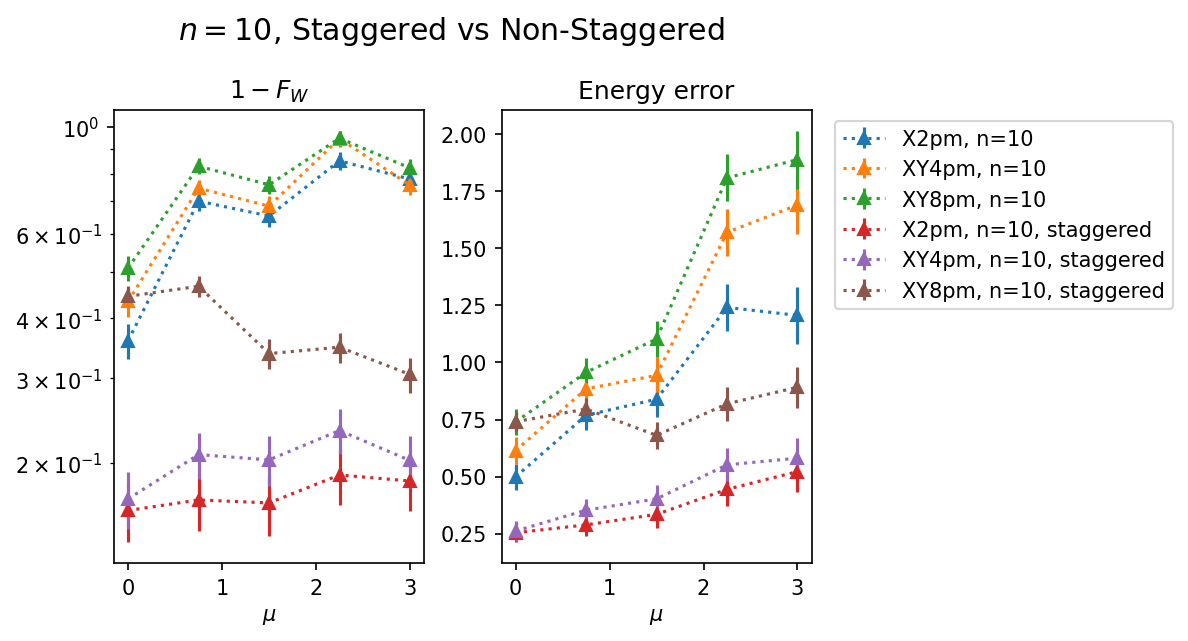

In [94]:
dd_sequences = ["X2pm", 'XY4pm', 'XY8pm']
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=dpi)
fig.subplots_adjust(wspace=0.25)

i=2

# values, stddev = fidelity_witness_avg[i][None]["pur"]
# ax1.errorbar(
#     params[i].chemical_potential_values,
#     1 - values,
#     yerr=2 * stddev,
#     fmt="s:",
#     label=f"No DD, n={params[i].n_modes}",
# )


for dd_sequence in dd_sequences:
    values, stddev = fidelity_witness_avg[i][dd_sequence]["pur"]
    ax1.errorbar(
        params[i].chemical_potential_values,
        1 - values,
        yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params[i].n_modes}",
    )

for dd_sequence in dd_sequences:
    values, stddev = fidelity_witness_avg_staggered[-1][dd_sequence]["pur"]
    ax1.errorbar(
        params_staggered[-1].chemical_potential_values,
        1 - values,
        yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params_staggered[-1].n_modes}, staggered",
    )

# for dd_sequence in dd_sequences:
#     values, stddev = fidelity_witness_avg[-2][dd_sequence]["pur"]
#     ax1.errorbar(
#         params[i].chemical_potential_values,
#         1 - values,
#         yerr=2 * stddev,
#         fmt="^:",
#         label=f"{dd_sequence}, n={params[-2].n_modes}",
# )

# values, stddev, percent_error = energy_error[i][None]["pur"]
# ax2.errorbar(
#     params[i].chemical_potential_values,
#     values,
#     # percent_error * 100,
#     # yerr=2 * stddev,
#     fmt="s:",
#     label=f"No DD, n={params[i].n_modes}",
# )


ax1.set_xlabel(r"$\mu$")
ax1.set_title(r"$1 - F_W$")
ax1.set_yscale("log")
# ax1.set_ylim(1e-2, 10)

for dd_sequence in dd_sequences:
    values, stddev, percent_error = energy_error[i][dd_sequence]["pur"]
    ax2.errorbar(
        params[i].chemical_potential_values,
        values,
        # percent_error * 100,
        yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params[i].n_modes}",
    )

for dd_sequence in dd_sequences:
    values, stddev, percent_error = energy_error_staggered[-1][dd_sequence]["pur"]
    ax2.errorbar(
        params_staggered[-1].chemical_potential_values,
        values,
        # percent_error * 100,
        yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params_staggered[-1].n_modes}, staggered",
    )

# for dd_sequence in dd_sequences:
#     values, stddev, percent_error = energy_error[-2][dd_sequence]["pur"]
#     ax2.errorbar(
#         params[i].chemical_potential_values,
#         values,
#         # percent_error * 100,
#         # yerr=2 * stddev,
#         fmt="^:",
#         label=f"{dd_sequence}, n={params[-2].n_modes}",
# )

ax2.set_xlabel(r"$\mu$")
ax2.set_title(r"Energy error")
# ax2.set_yscale("log")
# ax2.set_ylim(0, 10)
ax2.legend(bbox_to_anchor=(2.2, 1), loc="upper right")
fig.suptitle(
    rf"$n = {params[i].n_modes}$, Staggered vs Non-Staggered",
    size="x-large",
    y=1.04
)

data.add_figures(fig, "fidelity_witness_dd", overwrite=True)
plt.savefig(f"{PLOT_DIR}/fidelity_witness_dd_compare_n{params[i].n_modes}.{filetype}")
plt.show()

In [27]:
delay_times = {
    3: 29555232,
    4: 36547776,
    5: 60632032,
    6: 63100288,
    7: 89455520,
    8: 100155456,
    9: 133951968,
    10: 145424640,
    11: 183828640,
    12 : 194917312
}

In [28]:
cx_counts = {
    3: 538,
    4: 1008,
    5: 2238,
    6: 3220,
    7: 5634,
    8: 7336,
    9: 11334,
    10: 13932,
    11: 19882,
    12: 23584
}

In [47]:
bare = []
error_reduction_X2 = []
error_reduction_XY4 = []
error_reduction_XY8 = []
times = []
cx_error = []
for param, energy_err in zip(params, energy_error):
    times.append(delay_times[param.n_modes])
    cx_error.append(1 - (1 - 9.716e-1) ** cx_counts[param.n_modes])
    values_no_DD, _, percent_error_no_DD = energy_err[None]['pur']
    values_X2, _, percent_error_X2 = energy_err['X2pm']['pur']
    values_XY4, _, percent_error_XY4 = energy_err['XY4pm']['pur']
    values_XY8, _, percent_error_XY8 = energy_err['XY8pm']['pur']
    # error_reduction_X2.append(1 - np.divide(values_X2, values_no_DD))
    # error_reduction_XY4.append(1 - np.divide(values_XY4, values_no_DD))
    # error_reduction_XY8.append(1 - np.divide(values_XY8, values_no_DD))
    bare.append(percent_error_no_DD)
    error_reduction_X2.append(percent_error_X2)
    error_reduction_XY4.append(percent_error_XY4)
    error_reduction_XY8.append(percent_error_XY8)
    # error_reduction_X2.append(1 - np.divide(percent_error_X2, percent_error_no_DD))
    # error_reduction_XY4.append(1 - np.divide(percent_error_XY4, percent_error_no_DD))
    # error_reduction_XY8.append(1 - np.divide(percent_error_XY8, percent_error_no_DD))
times = np.asarray(times) * 1e-8
sorted_times = np.sort(times)
bare = np.asarray(bare).T
cx_error = np.asarray(cx_error).T
error_reduction_X2 = np.asarray(error_reduction_X2).T
error_reduction_XY4 = np.asarray(error_reduction_XY4).T
error_reduction_XY8 = np.asarray(error_reduction_XY8).T

In [31]:
error_reduction_XY4

array([[0.00593   , 0.02179673, 0.08770512, 0.08034418,        inf,
        0.0019147 , 0.0054965 , 0.02195969, 0.01828511, 0.02765343],
       [0.01157383, 0.02899587, 0.10901599, 0.06877011, 0.00887125,
        0.00607995, 0.00588006, 0.04067329, 0.01924836, 0.03074293],
       [0.01766082, 0.0305461 , 0.09473926, 0.07331355, 0.00598013,
        0.00641745, 0.00720441, 0.05771551, 0.02429938, 0.0389764 ],
       [0.02210298, 0.03829025, 0.12749499, 0.07209924, 0.00723669,
        0.00861341, 0.0065974 , 0.06562537, 0.02864976, 0.03121002],
       [0.02272868, 0.03809149, 0.11311037, 0.06659711, 0.00606802,
        0.00689889, 0.00790634, 0.04675198, 0.03218382, 0.03423764]])

In [43]:
x2_avg = np.average(np.clip(error_reduction_X2, -1, 1), 0)
x2_avg[4] = (x2_avg[4] * 5 - 1) / 4

xy4_avg = np.average(np.clip(error_reduction_XY4, -1, 1), 0)
xy4_avg[4] = (xy4_avg[4] * 5 - 1) / 4

xy8_avg = np.average(np.clip(error_reduction_XY8, -1, 1), 0)
xy8_avg[4] = (xy8_avg[4] * 5 - 1) / 4

In [44]:
from scipy.optimize import curve_fit
def exp_fit(x, a, b, c):
    return a * np.exp(b * x) + c

In [45]:
keys = [delay_times[key] * 1e-8 for key in cx_counts.keys()]
vals = np.asarray([val for val in cx_counts.values()])
vals = vals * xy8_avg.max() / vals[-1]

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

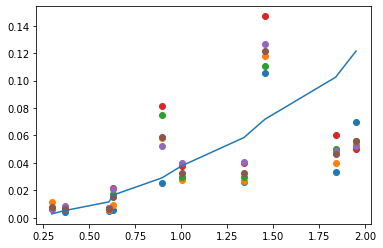

In [46]:
# plt.scatter(n_modes, error_reduction_X2[0])
# plt.scatter(n_modes, error_reduction_XY4[0])
# plt.scatter(n_modes, error_reduction_XY8[0])
# plt.scatter(n_modes, error_reduction_XY8[1])
# plt.scatter(n_modes, error_reduction_XY8[2])
# plt.scatter(n_modes, error_reduction_XY8[3])
# plt.scatter(n_modes, error_reduction_XY8[4])
for i in range(5):
    plt.scatter(times, error_reduction_XY8[i], label=f'{params[0].chemical_potential_values[i]}')
plt.plot(keys, vals)
plt.scatter(times, xy8_avg, label='average')

# i=3
# plt.scatter(times, bare[i], label='bare')
# plt.scatter(times, error_reduction_X2[i], label='X2')
# plt.scatter(times, error_reduction_XY4[i], label='XY4')
# plt.scatter(times, error_reduction_XY4[i], label='XY8')
# plt.legend()
# plt.title(f'{params[0].chemical_potential_values[i]}')

popt, pcov = curve_fit(exp_fit, np.asarray(times), xy8_avg)
plt.plot(sorted_times, exp_fit(sorted_times, *popt), label='cx_fit')
plt.legend()